<a href="https://colab.research.google.com/github/KPorus/machine-learning-and-python/blob/main/titanic_survive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
x = pd.read_csv("train.csv")
y = pd.read_csv("test.csv")

In [3]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
y.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
dfy = y.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1)
dfy['Sex'] = dfy['Sex'].map({'male': 0, 'female': 1})
dfy['Age'] = dfy['Age'].fillna(dfy['Age'].mean())
dfy['Fare'] = dfy['Fare'].fillna(dfy['Fare'].mean())
dfy.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [17]:
dfy.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


In [5]:
df = x.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [18]:
# dfy['Fare'] = MinMaxScaler().fit_transform(dfy[['Fare']])
dfy= StandardScaler().fit_transform(dfy)
dfy

array([[ 0.87348191, -0.75592895,  0.3349926 , -0.49947002, -0.4002477 ,
        -0.49840706],
       [ 0.87348191,  1.32287566,  1.32553003,  0.61699237, -0.4002477 ,
        -0.51327429],
       [-0.31581919, -0.75592895,  2.51417495, -0.49947002, -0.4002477 ,
        -0.46508846],
       ...,
       [ 0.87348191, -0.75592895,  0.65196458, -0.49947002, -0.4002477 ,
        -0.50879189],
       [ 0.87348191, -0.75592895,  0.        , -0.49947002, -0.4002477 ,
        -0.4944482 ],
       [ 0.87348191, -0.75592895,  0.        ,  0.61699237,  0.61989583,
        -0.23790598]])

In [8]:
# df['Fare'] = MinMaxScaler().fit_transform(df[['Fare']])
df.drop('Survived', axis=1, inplace=True)
df = StandardScaler().fit_transform(df)
df

array([[ 0.82737724, -0.73769513, -0.5924806 ,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.56610693,  1.35557354,  0.63878901,  0.43279337, -0.47367361,
         0.78684529],
       [ 0.82737724,  1.35557354, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [ 0.82737724,  1.35557354,  0.        ,  0.43279337,  2.00893337,
        -0.17626324],
       [-1.56610693, -0.73769513, -0.2846632 , -0.4745452 , -0.47367361,
        -0.04438104],
       [ 0.82737724, -0.73769513,  0.17706291, -0.4745452 , -0.47367361,
        -0.49237783]])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df, x['Survived'], test_size=0.2)

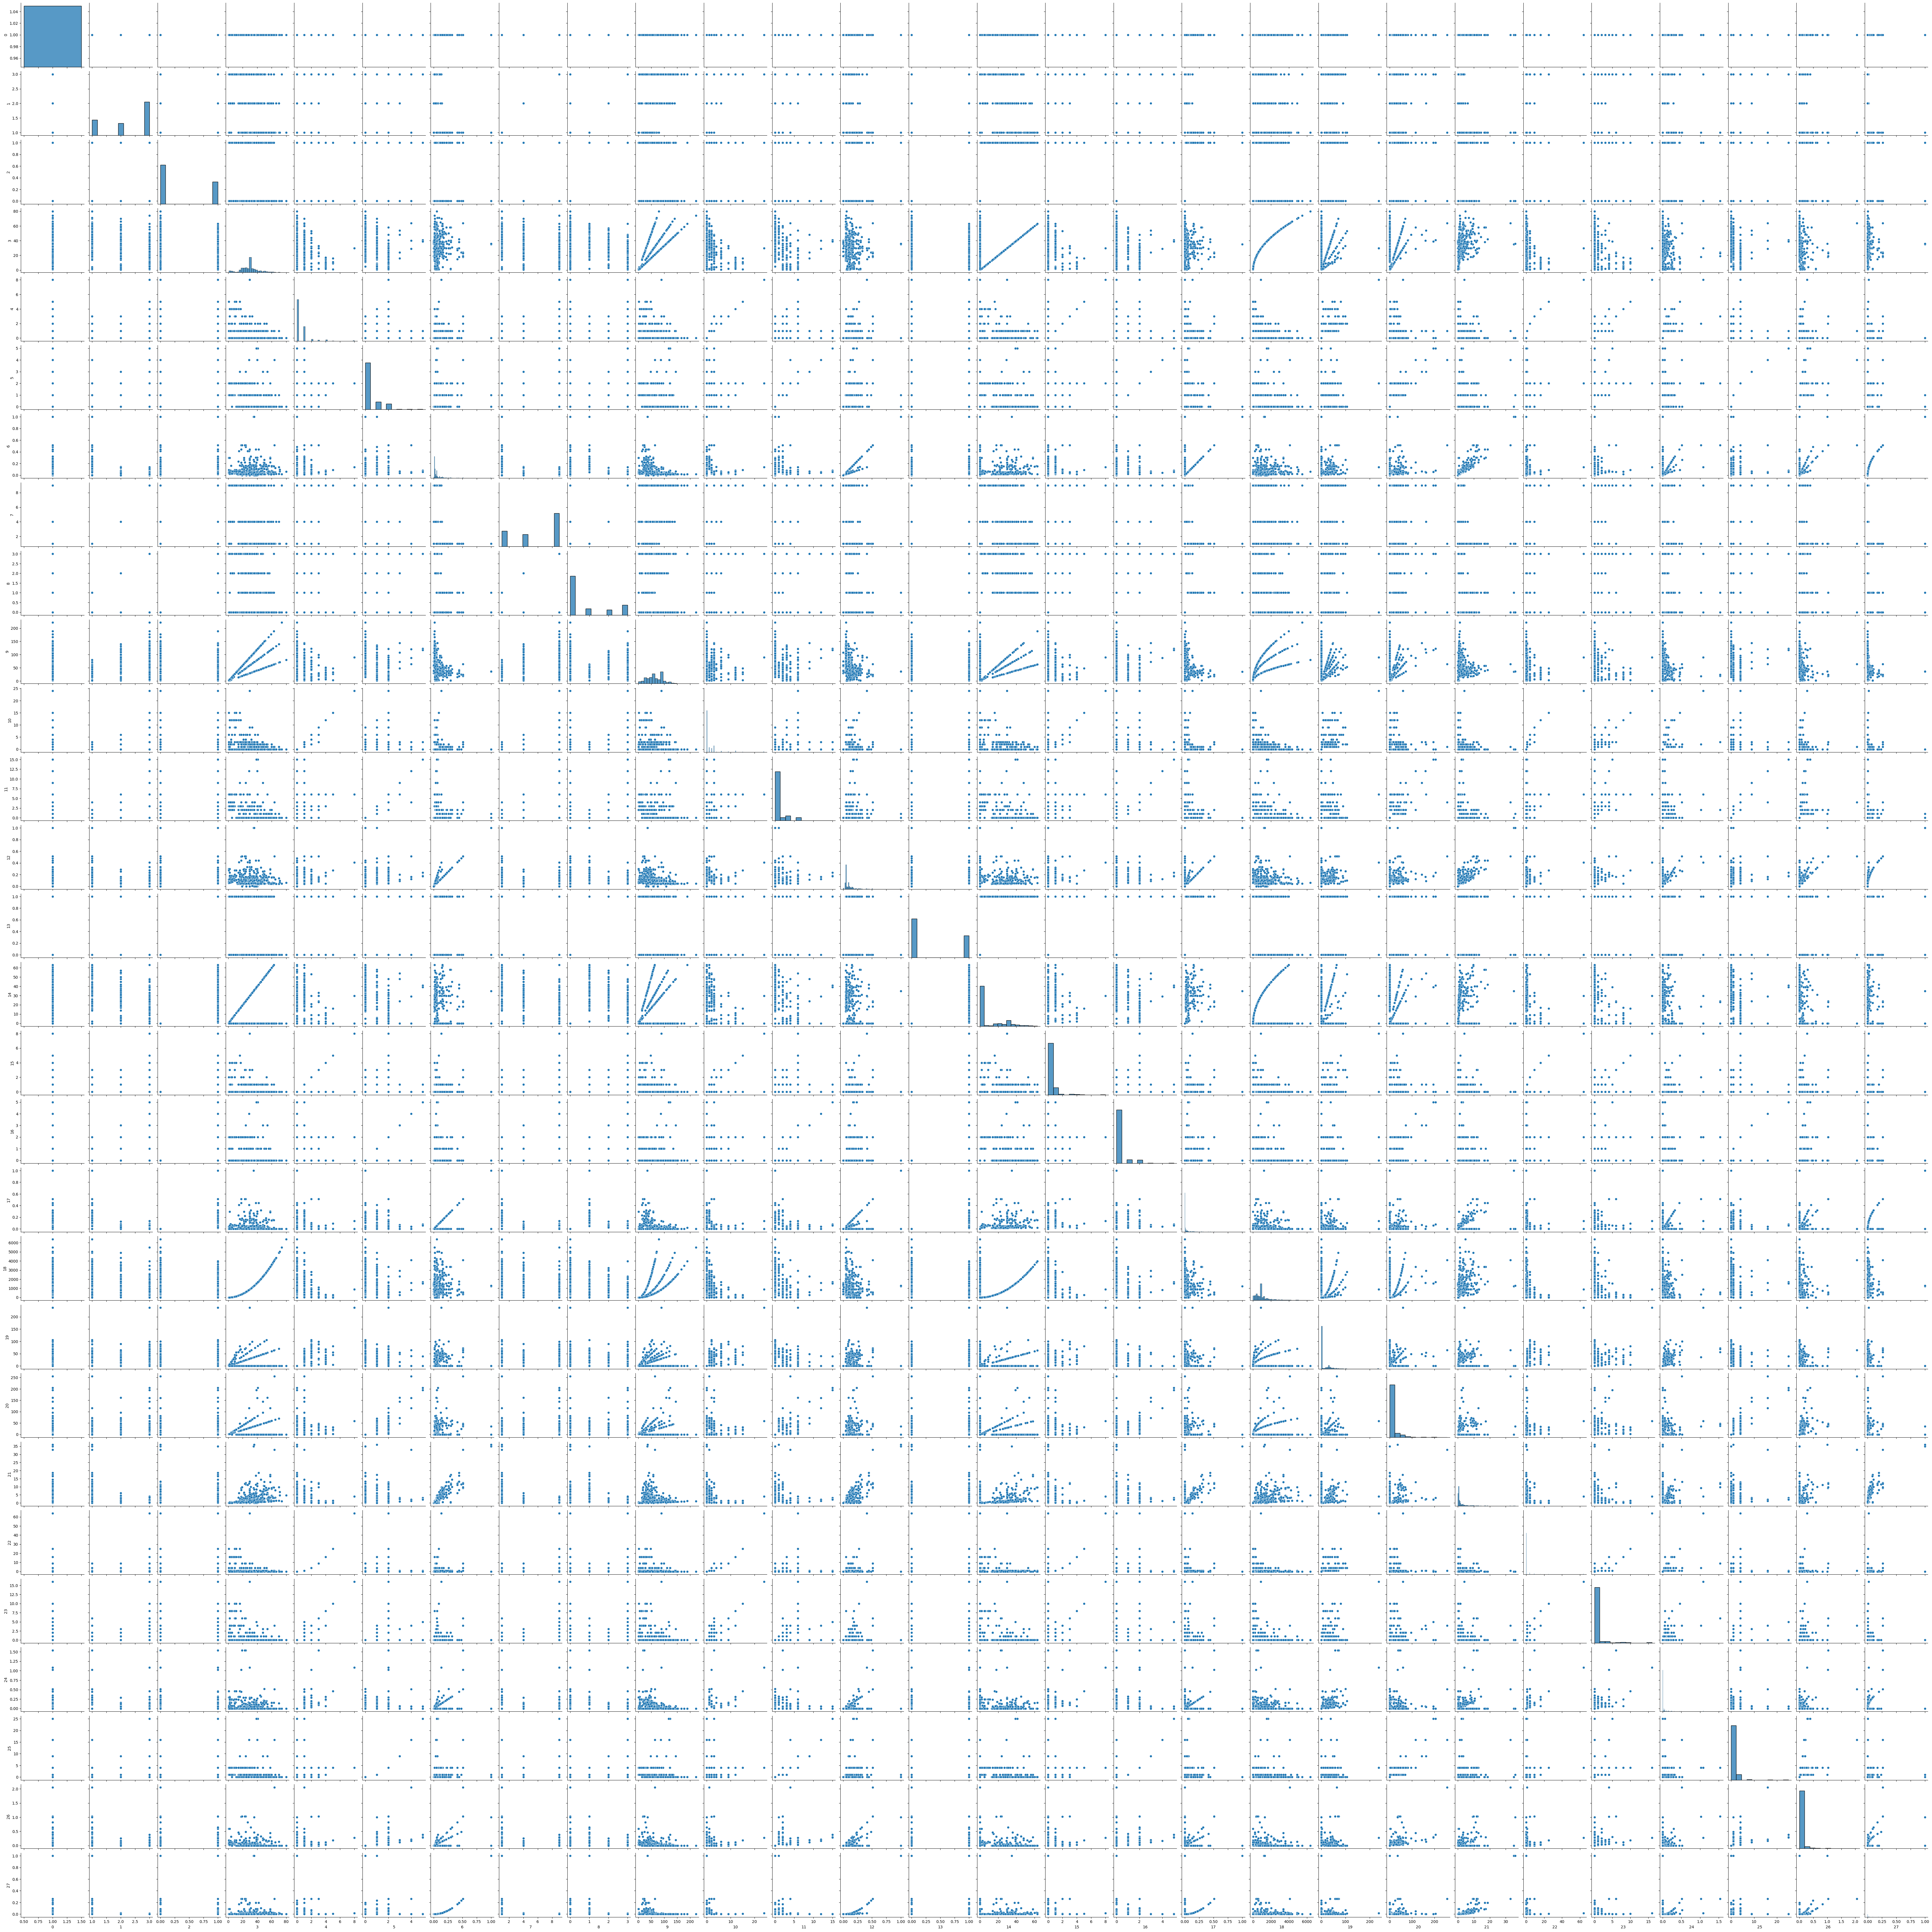

In [ ]:
import seaborn as sns
# Convert x_train to a Pandas DataFrame
x_train = pd.DataFrame(x_train)
sns.pairplot(x_train)
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
x_train_m = poly.fit_transform(x_train)
x_test_m = poly.transform(x_test)

In [11]:
model = LogisticRegression()
model.fit(x_train_m, y_train)
model.score(x_train_m,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8398876404494382

In [12]:
model.score(x_test_m,y_test)

0.7821229050279329

In [13]:
model.predict(x_test_m)

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0])

In [19]:
# Ensure dfy and y have the same number of rows before prediction.
# dfy.dropna(inplace=True)
# Convert y to DataFrame if it's not already
# if not isinstance(y, pd.DataFrame):
#     y = pd.DataFrame(y)
# y = y[y.index.isin(dfy.index)] # Filter 'y' to keep only rows that are also in 'dfy'
y_p = poly.transform(dfy)
y['Survived'] = model.predict(y_p)
y['Survived'] = y['Survived'].astype(int)
y.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
result = y[['PassengerId', 'Survived']]
result.to_csv('result.csv', index=False)

# using KNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
knn = KNeighborsClassifier(n_neighbors=30,p=3)
knn.fit(x_train, y_train)
knn.score(x_train, y_train)

0.8202247191011236

In [119]:
knn.score(x_test, y_test)

0.8044692737430168

In [ ]:
knn.predict(dfy)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [121]:
y['Survived'] =knn.predict(dfy)
y.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [123]:
result = y[['PassengerId', 'Survived']]
result.to_csv('result3.csv', index=False)

##Accuracy, percision, recall calculate

In [120]:
knn_pred = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, knn_pred)
precision_knn = precision_score(y_test, knn_pred)
recall_knn = recall_score(y_test, knn_pred)
f1_knn = f1_score(y_test, knn_pred)

lo = model.predict(x_test_m)
accuracy_lo = accuracy_score(y_test, lo)
precision_lo = precision_score(y_test, lo)
recall_lo = recall_score(y_test, lo)
f1_lo = f1_score(y_test, lo)

print(f"KNN Accuracy: {accuracy_knn}")
print(f"KNN Precision: {precision_knn}")
print(f"KNN Recall: {recall_knn}")
print(f"KNN F1 Score: {f1_knn}\n\n")

print(f"Logistic Accuracy: {accuracy_lo}")
print(f"Logistic Precision: {precision_lo}")
print(f"Logistic Recall: {recall_lo}")
print(f"Logistic F1 Score: {f1_lo}")

KNN Accuracy: 0.8044692737430168
KNN Precision: 0.7868852459016393
KNN Recall: 0.6857142857142857
KNN F1 Score: 0.732824427480916


Logistic Accuracy: 0.7821229050279329
Logistic Precision: 0.7719298245614035
Logistic Recall: 0.6285714285714286
Logistic F1 Score: 0.6929133858267716


#Decision tree

In [136]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight="balanced",criterion="gini", max_depth=5, splitter="best")
# dt = DecisionTreeClassifier(class_weight="balanced",criterion="gini", max_depth=10, min_samples_split=10,min_samples_leaf=15)
# dt = DecisionTreeClassifier(class_weight="balanced",criterion="gini", max_depth=10, min_samples_split=10,min_samples_leaf=10)
dt.fit(x_train, y_train)
dt.score(x_train, y_train)

0.851123595505618

In [137]:
dt.score(x_test, y_test)

0.7932960893854749

In [138]:
dt_pred= dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, dt_pred)
precision_dt = precision_score(y_test, dt_pred)
recall_dt = recall_score(y_test, dt_pred)
f1_dt = f1_score(y_test, dt_pred)


print(f"Decision tree Accuracy: {accuracy_dt}")
print(f"Decision tree Precision: {precision_dt}")
print(f"Decision tree Recall: {recall_dt}")
print(f"Decision tree F1 Score: {f1_dt}\n")

Decision tree Accuracy: 0.7932960893854749
Decision tree Precision: 0.7704918032786885
Decision tree Recall: 0.6714285714285714
Decision tree F1 Score: 0.7175572519083969



In [102]:
y['Survived'] =dt.predict(dfy)
y.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [103]:
result = y[['PassengerId', 'Survived']]
result.to_csv('result1.csv', index=False)